In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
df= pd.read_excel('finaldata.xlsx',engine='openpyxl')

In [5]:
df["DATE_OF_BIRTH_MONTH"] = pd.to_datetime(df.DATE_OF_BIRTH).dt.month

In [6]:
df["DATE_OF_BIRTH_YEAR"] = pd.to_datetime(df.DATE_OF_BIRTH).dt.year

In [7]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,DATE_OF_BIRTH_MONTH,DATE_OF_BIRTH_YEAR
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,67980,2,60,Due,5,Inactive,0,1,6,1959
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,19350,5,90,Up-to-Date,7,Active,0,1,2,1989
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,11970,3,70,Missed,2,Active,1,0,3,2004
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,32980,3,70,Missed,5,Active,0,1,2,1966
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,26800,2,60,Up-to-Date,8,Active,0,1,1,2006


Text(0.5, 1.0, 'Distribution of total expenditure, by sales strategy')

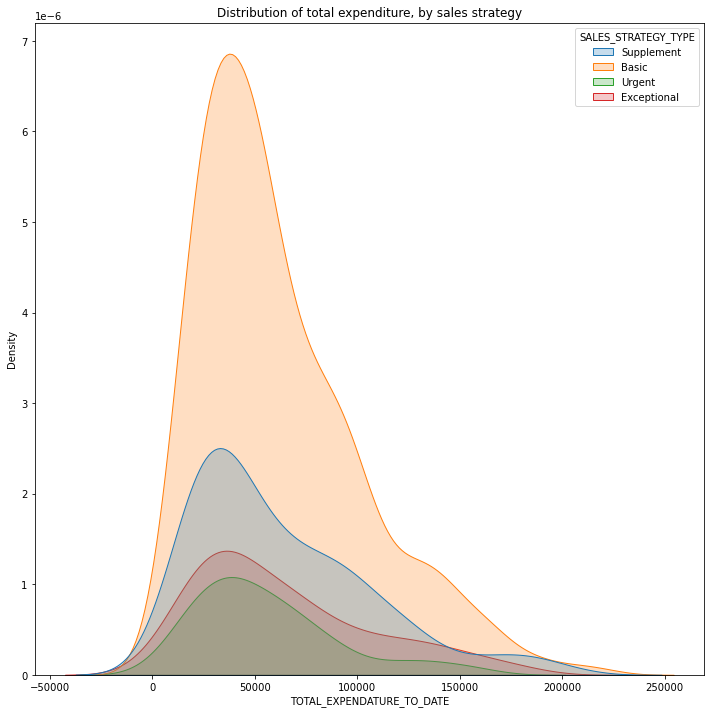

In [27]:
# KDE plots for each species
plt.figure(figsize=(12,12))
sns.kdeplot(data=df, x='TOTAL_EXPENDATURE_TO_DATE', hue='SALES_STRATEGY_TYPE',shade=True)

# Add title

plt.title("Distribution of total expenditure, by sales strategy")

In [24]:
expenditure_salescallstatus =df.groupby('SALES_STRATEGY_TYPE')['TOTAL_EXPENDATURE_TO_DATE'].mean().index

In [25]:
expenditure_salescallstatusval =df.groupby('SALES_STRATEGY_TYPE')['TOTAL_EXPENDATURE_TO_DATE'].mean().values

([<matplotlib.patches.Wedge at 0x7f7d45624f98>,
 [Text(0.766590935481032, 0.7888842358916273, 'Basic'),
  Text(-0.824621002046856, 0.7280111283374996, 'Exceptional'),
  Text(-0.6809396256402065, -0.8638988518530255, 'Supplement'),
  Text(0.830366790208202, -0.7214506176581514, 'Urgent')],
 [Text(0.418140510262381, 0.4303004923045239, '25.46%'),
  Text(-0.44979327384373957, 0.39709697909318153, '26.07%'),
  Text(-0.3714216139855671, -0.47121755555619566, '25.71%'),
  Text(0.45292734011356467, -0.393518518722628, '22.77%')])

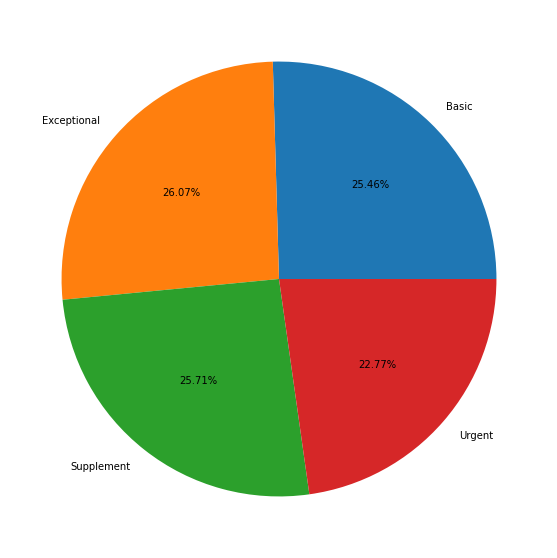

In [26]:
plt.figure(figsize=(15,10))
plt.pie(expenditure_salescallstatusval[:10],labels=expenditure_salescallstatus[:10],autopct='%1.2f%%')

# There are lot of people whose expenditure are higher and have been targetted with exceptional , basic .

In [28]:
import pylab 
import scipy.stats as stats

((array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
         -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
         -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
         -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
         -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
         -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
         -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
         -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
         -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
         -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
         -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
         -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
         -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,

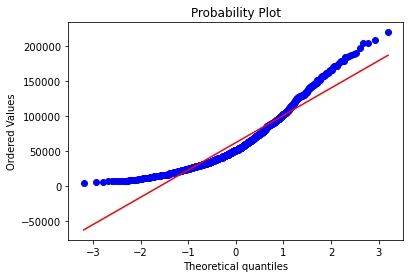

In [30]:
stats.probplot(df['TOTAL_EXPENDATURE_TO_DATE'], plot=sns.mpl.pyplot)

# The total expenditures till date almost forms a N.D with some extreme data on the right 

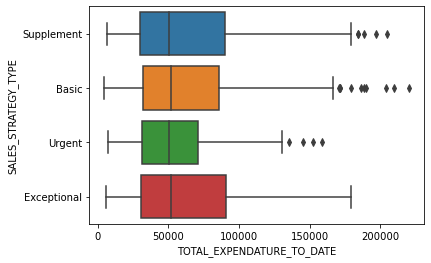

In [32]:
sns.boxplot( y=df["SALES_STRATEGY_TYPE"], x=df["TOTAL_EXPENDATURE_TO_DATE"] );
plt.show()

# Recommendation 

# The institution must revisit their sales strategies in order to  pull out a more effective campaign

# A hypothesis tetsing must be taken to see if the company is taking any features into account for devising the sales strategy

In [33]:
df['SALES_SCHEME_CODE'].value_counts()

F1    553
H1    251
H2    147
G1     49
Name: SALES_SCHEME_CODE, dtype: int64

In [34]:
df.columns

Index(['CUSTOMER_NUMBER', 'DATE_OF_BIRTH', 'GENDER', 'STREET_ADDRESS',
       'COUNTRY', 'CUSTOMER_NAME', 'SALES_SCHEME_CODE', 'SALES_STRATEGY_TYPE',
       'MARITAL_STATUS', 'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE',
       'START_DATE', 'OCC_CODE', 'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE',
       'GROCERY_WEEKLY_SPENDING', 'TOTAL_EXPENDATURE_TO_DATE',
       'NO_ITEMS_PURCHASED', 'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS',
       'STORES_VISITED', 'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE',
       'DATE_OF_BIRTH_MONTH', 'DATE_OF_BIRTH_YEAR'],
      dtype='object')

In [35]:
salesscheme_best =df.groupby('SALES_SCHEME_CODE')['NO_ITEMS_PURCHASED'].mean().index

In [36]:
salesscheme_bestval =df.groupby('SALES_SCHEME_CODE')['NO_ITEMS_PURCHASED'].mean().values

([<matplotlib.patches.Wedge at 0x7f7d44aa2b70>,
 [Text(0.7036300748765572, 0.8455203827993805, 'F1'),
  Text(-0.8331984161382215, 0.7181785288803608, 'G1'),
  Text(-0.7487925313554664, -0.8057975831350408, 'H1'),
  Text(0.8186543209684795, -0.7347143000919731, 'H2')],
 [Text(0.38379822265994024, 0.4611929360723893, '27.91%'),
  Text(-0.45447186334812073, 0.3917337430256513, '21.54%'),
  Text(-0.40843228983025437, -0.4395259544372949, '27.27%'),
  Text(0.4465387205282615, -0.40075325459562167, '23.28%')])

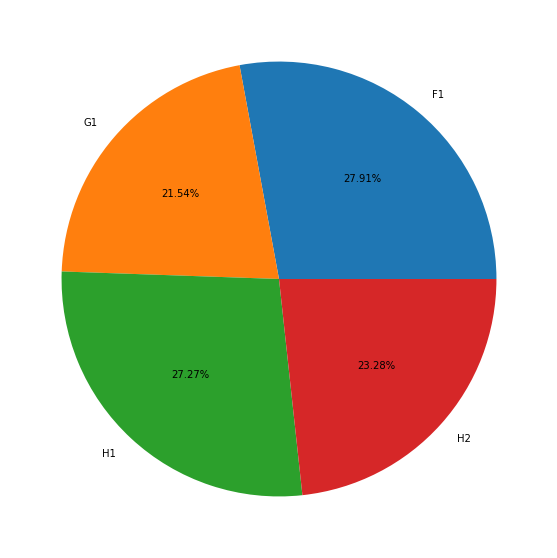

In [37]:
plt.figure(figsize=(15,10))
plt.pie(salesscheme_bestval[:10],labels=salesscheme_best[:10],autopct='%1.2f%%')

# F1 sales scheme seems to be more effective and the most commendable one than the rest 

# Lets see if their means of the  items sold have any difference before naming F1 as the best 

# One way anova to confirm the above

In [38]:
df_anova = df[['NO_ITEMS_PURCHASED','SALES_SCHEME_CODE']]

In [39]:
grps = pd.unique(df_anova.SALES_SCHEME_CODE.values)

In [40]:
grps   ##Unique values

array(['H1', 'F1', 'G1', 'H2'], dtype=object)

In [42]:
d_data = {grp:df_anova['NO_ITEMS_PURCHASED'][df_anova.SALES_SCHEME_CODE == grp] for grp in grps}

In [44]:
F, p = stats.f_oneway(d_data['H1'], d_data['F1'], d_data['G1'], d_data['H2'])

In [45]:
print(p)

8.651927258939329e-06


In [46]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


# we are rejecting the null hypothesis and hence there is a difference in the buying behaviors  as far as the sales schemes  are concerned

In [47]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,DATE_OF_BIRTH_MONTH,DATE_OF_BIRTH_YEAR
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,67980,2,60,Due,5,Inactive,0,1,6,1959
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,19350,5,90,Up-to-Date,7,Active,0,1,2,1989
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,11970,3,70,Missed,2,Active,1,0,3,2004
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,32980,3,70,Missed,5,Active,0,1,2,1966
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,26800,2,60,Up-to-Date,8,Active,0,1,1,2006


In [49]:
pip install statsmodels


     |████████████████████████████████| 9.5 MB 4.3 MB/s            
     |████████████████████████████████| 233 kB 42.5 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [59]:
from statsmodels.formula.api import ols

In [63]:
import statsmodels.api as sm

In [67]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,DATE_OF_BIRTH_MONTH,DATE_OF_BIRTH_YEAR
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,67980,2,60,Due,5,Inactive,0,1,6,1959
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,19350,5,90,Up-to-Date,7,Active,0,1,2,1989
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,11970,3,70,Missed,2,Active,1,0,3,2004
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,32980,3,70,Missed,5,Active,0,1,2,1966
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,26800,2,60,Up-to-Date,8,Active,0,1,1,2006


In [69]:
df['Reg_MONTH'] =  pd.to_datetime(df.REG_DATE).dt.month

In [70]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,DATE_OF_BIRTH_MONTH,DATE_OF_BIRTH_YEAR,Reg_MONth,Reg_MONTH
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,60,Due,5,Inactive,0,1,6,1959,1,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,90,Up-to-Date,7,Active,0,1,2,1989,7,7
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,70,Missed,2,Active,1,0,3,2004,6,6
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,70,Missed,5,Active,0,1,2,1966,4,4
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,60,Up-to-Date,8,Active,0,1,1,2006,9,9


In [71]:
df.drop('Reg_MONth',axis=1,inplace=True)

# Q8.Does when someone is  registered with the company have any effect on sale

In [72]:
dataset_table=pd.crosstab(df['Reg_MONTH'],df['SALE'])

In [73]:
dataset_table

SALE,0,1
Reg_MONTH,,
1,19,29
2,46,36
3,37,48
4,46,50
5,56,57
6,47,46
7,38,47
8,53,37
9,38,46


In [74]:
dataset_table.values 

array([[19, 29],
       [46, 36],
       [37, 48],
       [46, 50],
       [56, 57],
       [47, 46],
       [38, 47],
       [53, 37],
       [38, 46],
       [48, 49],
       [46, 39],
       [26, 16]])

In [75]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[19 29]
 [46 36]
 [37 48]
 [46 50]
 [56 57]
 [47 46]
 [38 47]
 [53 37]
 [38 46]
 [48 49]
 [46 39]
 [26 16]]


In [76]:
val=stats.chi2_contingency(dataset_table)

In [77]:
Expected_Values=val[3]

In [79]:
no_of_rows=len(dataset_table.iloc[0:,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 11


In [80]:


from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [81]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


critical_value: 19.67513757268249


In [82]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.33151789291990763
Significance level:  0.05
Degree of Freedom:  11
p-value: 0.33151789291990763


In [83]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# So it is clear that there is no relationship when someone is registered when making a purchase

In [84]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,DATE_OF_BIRTH_MONTH,DATE_OF_BIRTH_YEAR,Reg_MONTH
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,2,60,Due,5,Inactive,0,1,6,1959,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,5,90,Up-to-Date,7,Active,0,1,2,1989,7
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,3,70,Missed,2,Active,1,0,3,2004,6
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,3,70,Missed,5,Active,0,1,2,1966,4
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,2,60,Up-to-Date,8,Active,0,1,1,2006,9


<AxesSubplot:>

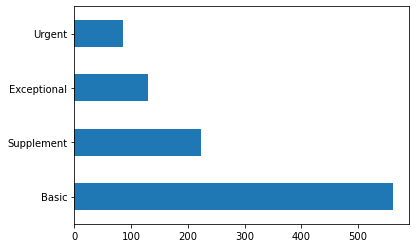

In [87]:
df['SALES_STRATEGY_TYPE'].value_counts().plot(kind='barh')

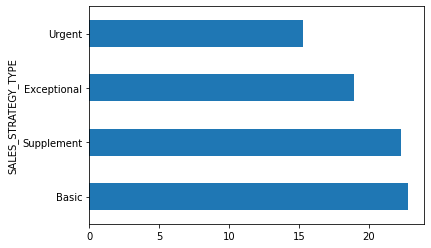

In [91]:
sales_strategy_customerengagement = df.groupby('SALES_STRATEGY_TYPE')['DAYS_SINCE_CUSTOMER_ENGAGEMENT'].mean().sort_values(ascending = False).plot(kind='barh')

# Most people from 'basic' have more engagment days and have to be targetted with discounts to be more engaged